# Finding the best districts of Hamburg to establish a new book-publishing house.

## 1. Introduction/Business Problem

### As an aspiring entrepreneur and founder of a new book-publishing house, selecting the best location for the company headquarters is an important task. There are a lot of different criteria to keep in mind, if this endeavor will highly likely result in a successful business. For example, is the location conveniently situated to be easily reachable by train, car or other means for aspiring authors to visit the location or attractive enough for renown editors to relocate their main place of residence into this neighborhood? But of course typical rental prices in the different boroughs and spatial proximity to the center of a city are also pretty relevant. And having a lot of bookstores around could give lots of opportunities for additional marketing opportunities with selected bookstores and easily accessible readers frequenting the bookstores regularly and are potentially recruitable as voluntary book testers or even as long reaching influencers over the different channels of the internet. So in summary, considering all of the aspects and variables above, can we get insight by the means of a data analysis to make a better informed decision of where to establish a new book-publishing house in the city of Hamburg?

## 2. Discussion of the Data used in the Analysis

### The analysis has been undertaken by combining data from three different sources. The first source is data about demographic, traffic and other urban related information concerning the 104 different districts of Hamburg. It can be found at 
### https://www.statistik-nord.de/fileadmin/Dokumente/Datenbanken_und_Karten/Stadtteilprofile/StadtteilprofileBerichtsjahr2017.xlsx
### This data set contains variables and descriptions in German, but the necessary translations in English will be performed during this data analysis. We are especially interested in prices for real estates in the different districts. The second data set is from Wikipedia. 
### https://de.wikipedia.org/wiki/Liste_der_Bezirke_und_Stadtteile_Hamburgs
### It gives access to the geographical coordinates of the different districts of Hamburg. This information can be combined with the aforementioned data set to get quantitative information about how close a neighborhood is located in relation to the center of the city. This information also builds the backbone for the access of our third data set. The final data source is the Foursquare database found at foursquare.com. Here we get information about the availability and quality of the bookstores in the vicinity and also about the quality of the transport connections via train and other kinds of traffic to this area of the city.


## 3. Exploratory Data Analysis

Importing relevant libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np # library to handle data in a vectorized manner
from scipy.spatial import distance
import random # library for random number generation
import json
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

!conda install -c conda-forge BeautifulSoup4 --yes
from bs4 import BeautifulSoup

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

!conda install -c conda-forge geocoder --yes 
import geocoder

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

!conda install -c anaconda lxml --yes
import lxml
import xml
!conda install -c anaconda xlrd --yes
from pandas import ExcelWriter
from pandas import ExcelFile

    
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

print('Libraries imported.')


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  env

Loading the demographic data set of the districts of Hamburg

In [2]:
!wget -q -O 'StadtteilprofileBerichtsjahr2017.xlsx' https://www.statistik-nord.de/fileadmin/Dokumente/Datenbanken_und_Karten/Stadtteilprofile
demographic_df = pd.read_csv('StadtteilprofileBerichtsjahr2017.csv', sep = ';')
demographic_df.head(20)

Stadtteile  Bevölkerung Unter 18-Jährige  \
0                    Hamburg-Altstadt    2 305                  277   
1                           HafenCity    3 627                  756   
2                            Neustadt   12 719            1 456       
3                           St. Pauli   22 501            2 991       
4                           St. Georg   11 055            1 108       
5                         Hammerbrook    3 939                  448   
6                           Borgfelde    7 635                  834   
7                                Hamm   38 716            4 453       
8                                Horn   38 569            6 001       
9                           Billstedt   70 539           13 653       
10                          Billbrook    2 097                  650   
11                     Rothenburgsort    9 225            1 581       
12                             Veddel    4 667                  925   
13                       Wilhelmsburg   54 169           11 236       
14  Kleiner Grasbrook und Steinwerder    1 243                   70   
15        Waltershof und Finkenwerder   11 765            1 896       
16                    Altona-Altstadt   29 408            4 486       
17                       Sternschanze    8 080            1 146       
18                        Altona-Nord   22 946            3 647       
19                           Ottensen   35 480            5 585       

    65-Jährige und Ältere Ausländerinnen und Ausländer  \
0                     256                          506   
1                     333                    1 168       
2               1 836                        2 580       
3               2 150                        4 880       
4               1 397                        2 552       
5                     133                    1 812       
6                     923                    2 201       
7               5 398                        7 037       
8               6 039                        9 906       
9              12 646                       17 768       
10                    116                    1 635       
11              1 344                        2 593       
12                    388                    2 106       
13              7 294                       17 593       
14                     67                          464   
15              2 316                        1 985       
16              3 783                        5 757       
17                    828                    1 612       
18              2 297                        4 387       
19              4 891                        4 577       

   Bevölkerung mit Migrations-hintergrund  \
0                                     990   
1                               1 718       
2                               4 670       
3                               8 309       
4                               4 274       
5                               2 470       
6                               3 403       
7                              13 792       
8                              19 729       
9                              40 525       
10                              1 806       
11                              5 147       
12                              3 374       
13                             32 447       
14                                    615   
15                              3 511       
16                             11 150       
17                              2 962       
18                              8 365       
19                              9 342       

   Unter 18-Jährige mit Migrations-hintergrund    Haushalte  \
0                                          182    1 508       
1                                          512    1 745       
2                                          732    8 755       
3                                    1 435       15 163       
4                                          588    7 207

Loading the geospatial dataset from wikipedia

In [3]:
wikidata = requests.get('https://de.wikipedia.org/wiki/Liste_der_Bezirke_und_Stadtteile_Hamburgs')
wikicontent = BeautifulSoup(wikidata.content, "html.parser")
wikitable= wikicontent.find_all('table')[1] 
coordinates_df = pd.read_html(str(wikitable))[0]
coordinates_df



Stadtteil  Ortsteile         Bezirk  Fläche(km²)  Einwohner  \
0        Hamburg-Altstadt        NaN  Hamburg-Mitte          NaN   2272.000   
1               HafenCity        NaN  Hamburg-Mitte          NaN   4592.000   
2                Neustadt        NaN  Hamburg-Mitte          NaN     12.920   
3               St. Pauli        NaN  Hamburg-Mitte          NaN     22.436   
4               St. Georg        NaN  Hamburg-Mitte          NaN     11.384   
5             Hammerbrook        NaN  Hamburg-Mitte          NaN   4323.000   
6               Borgfelde        NaN  Hamburg-Mitte          NaN   7696.000   
7                    Hamm        NaN  Hamburg-Mitte          NaN     38.773   
8                    Horn        NaN  Hamburg-Mitte          NaN     38.799   
9               Billstedt        NaN  Hamburg-Mitte          NaN     70.355   
10              Billbrook        NaN  Hamburg-Mitte          NaN   1992.000   
11         Rothenburgsort        NaN  Hamburg-Mitte          NaN   9268.000   
12                 Veddel        NaN  Hamburg-Mitte          NaN   4632.000   
13           Wilhelmsburg        NaN  Hamburg-Mitte          NaN     54.068   
14      Kleiner Grasbrook        NaN  Hamburg-Mitte          NaN   1200.000   
15            Steinwerder        NaN  Hamburg-Mitte          NaN     39.000   
16             Waltershof        NaN  Hamburg-Mitte          NaN      0.000   
17           Finkenwerder        NaN  Hamburg-Mitte          NaN     11.808   
18                Neuwerk        NaN  Hamburg-Mitte          NaN     40.000   
19        Altona-Altstadt        NaN         Altona          NaN     29.305   
20           Sternschanze        NaN         Altona          NaN   8095.000   
21            Altona-Nord        NaN         Altona          NaN     24.153   
22               Ottensen        NaN         Altona          NaN     35.585   
23             Bahrenfeld        NaN         Altona          NaN     29.976   
24          Groß Flottbek        NaN         Altona          NaN     11.086   
25            Othmarschen        NaN         Altona          NaN     15.591   
26                  Lurup        NaN         Altona          NaN     36.695   
27                 Osdorf        NaN         Altona          NaN     26.635   
28            Nienstedten        NaN         Altona          NaN   7274.000   
29             Blankenese        NaN         Altona          NaN     13.686   
30              Iserbrook        NaN         Altona          NaN     11.369   
31               Sülldorf        NaN         Altona          NaN   9489.000   
32                 Rissen        NaN         Altona          NaN     15.763   
33             Eimsbüttel        NaN     Eimsbüttel          NaN     58.196   
34             Rotherbaum        NaN     Eimsbüttel          NaN     16.875   
35           Harvestehude        NaN     Eimsbüttel          NaN     17.944   
36          Hoheluft-West        NaN     Eimsbüttel          NaN     13.438   
37               Lokstedt        NaN     Eimsbüttel          NaN     28.793   
38               Niendorf        NaN     Eimsbüttel          NaN     40.717   
39              Schnelsen        NaN     Eimsbüttel          NaN     29.300   
40             Eidelstedt        NaN     Eimsbüttel          NaN     33.421   
41             Stellingen        NaN     Eimsbüttel          NaN     26.185   
42           Hoheluft-Ost        NaN   Hamburg-Nord          NaN   9796.000   
43              Eppendorf        NaN   Hamburg-Nord          NaN     24.868   
44           Groß Borstel        NaN   Hamburg-Nord          NaN   8734.000   
45             Alsterdorf        NaN   Hamburg-Nord          NaN     15.174   
46             Winterhude        NaN   Hamburg-Nord          NaN     55.900   
47             Uhlenhorst        NaN   Hamburg-Nord          NaN     18.736   
48             Hohenfelde        NaN   Hamburg-Nord          NaN     10.143   
49            Barmbek-Süd        NaN   Hamburg-Nord          NaN  

In [4]:
Latitude = [ 53.55, 53.541111, 53.551944, 53.556944, 53.555   , 53.545278, 53.554722, 53.560833, 53.553889, 53.540556, 
            53.527778, 53.535, 53.516667, 53.495, 53.534444, 53.527222, 53.548889, 53.561667, 53.563056, 53.553889, 
            53.573889, 53.565278, 53.552778, 53.593056, 53.572778, 53.555, 53.558333, 53.576389, 53.585, 53.583056,
            53.575833, 53.568056, 53.577778, 53.58, 53.603056, 53.617778, 53.633333, 53.606944, 53.592222, 53.584722, 
            53.595556, 53.613611, 53.610833, 53.6, 53.5725, 53.561667, 53.58, 53.566667, 53.605278, 53.625833, 
            53.634444, 53.665556, 53.567778, 53.581944, 53.568889, 53.572222, 53.586111, 53.606389, 53.608611, 53.610278,
            53.637778, 53.653889, 53.659167, 53.647778, 53.69, 53.708056, 53.692778, 53.671111, 53.649722, 53.601944,
            53.509444, 53.488056, 53.458611, 53.424722, 53.446389, 53.419722, 53.473611, 53.467778, 53.486111, 53.502778,
            53.501389, 53.4875, 53.5, 53.483333, 53.459259, 53.471111, 53.443611, 53.4375, 53.437222, 53.423889,
            53.435833, 53.455833, 53.463889, 53.489167, 53.466667, 53.483333, 53.508056, 53.514722, 53.536944]
Longitude = [10   , 10.000278,  9.985556,  9.963889, 10.012222, 10.030556, 10.034444, 10.057778, 10.09    , 10.101111, 
             10.086111, 10.040833, 10.033333, 10.011111, 9.957222, 9.866111, 9.947778, 9.962222, 9.945278, 9.917778, 
             9.8925, 9.8775, 9.894444, 9.882778, 9.846667, 9.844722, 9.811111, 9.823333, 9.794167, 9.753611,
             9.951667, 9.988333, 9.988889, 9.967222, 9.956389, 9.950278, 9.916667, 9.906111, 9.928611, 9.976111, 
             9.983889, 9.9825, 10.013056, 10, 10.018611, 10.020833, 10.040556, 10.05, 10.04, 10.031389, 
             10.016111, 10.001389, 10.045556, 10.084167, 10.085833, 10.136111, 10.124722, 10.119722, 10.0725, 10.059167,
             10.081111, 10.111944, 10.084722, 10.041389, 10.096389, 10.104444, 10.131111, 10.126944, 10.184167, 10.156667,
             10.182222, 10.2125, 10.215833, 10.2625, 10.221944, 10.201667, 10.080556, 10.148333, 10.154167, 10.138889,
             10.079167, 10.079167, 10.233333, 10.166667, 9.982672, 10.024722, 9.984167, 10.004444, 9.986111, 9.980556,
             9.968611, 9.954444, 9.956111, 9.943611, 9.883333, 9.85, 9.852778, 9.795556, 9.780556]

Adding Latitude and Longitude to the District dataset

In [5]:
coordinates_df = coordinates_df[['Stadtteil','Koordinaten']]
coordinates_df = coordinates_df.rename(columns = {'Stadtteil':'District','Koordinaten':'Coordinates'})
coordinates_df.head(10)

demographic_df['Latitude'] = Latitude
demographic_df['Longitude'] = Longitude

city_df = demographic_df[['Stadtteile','Preise für Eigentums-wohnungen in EUR/m² (Jan 2018)','Latitude','Longitude']]
city_df = city_df.rename(columns = {'Stadtteile':'District','Preise für Eigentums-wohnungen in EUR/m² (Jan 2018)':'Prices'})
city_df

District  Prices   Latitude  Longitude
0                    Hamburg-Altstadt    5710  53.550000  10.000000
1                           HafenCity    7958  53.541111  10.000278
2                            Neustadt    5081  53.551944   9.985556
3                           St. Pauli    5991  53.556944   9.963889
4                           St. Georg    5169  53.555000  10.012222
5                         Hammerbrook    3814  53.545278  10.030556
6                           Borgfelde    3614  53.554722  10.034444
7                                Hamm    3414  53.560833  10.057778
8                                Horn    2789  53.553889  10.090000
9                           Billstedt    2932  53.540556  10.101111
10                          Billbrook    2932  53.527778  10.086111
11                     Rothenburgsort    3937  53.535000  10.040833
12                             Veddel    3937  53.516667  10.033333
13                       Wilhelmsburg    3249  53.495000  10.011111
14  Kleiner Grasbrook und Steinwerder    3814  53.534444   9.957222
15        Waltershof und Finkenwerder    4514  53.527222   9.866111
16                    Altona-Altstadt    6064  53.548889   9.947778
17                       Sternschanze    5302  53.561667   9.962222
18                        Altona-Nord    6064  53.563056   9.945278
19                           Ottensen    5512  53.553889   9.917778
20                         Bahrenfeld    4514  53.573889   9.892500
21                      Groß Flottbek    5211  53.565278   9.877500
22                        Othmarschen    5646  53.552778   9.894444
23                              Lurup    3239  53.593056   9.882778
24                             Osdorf    3621  53.572778   9.846667
25                        Nienstedten    5886  53.555000   9.844722
26                         Blankenese    5908  53.558333   9.811111
27                          Iserbrook    3291  53.576389   9.823333
28                           Sülldorf    4502  53.585000   9.794167
29                             Rissen    3942  53.583056   9.753611
30                         Eimsbüttel    4982  53.575833   9.951667
31                         Rotherbaum    6668  53.568056   9.988333
32                       Harvestehude    8560  53.577778   9.988889
33                      Hoheluft-West    5624  53.580000   9.967222
34                           Lokstedt    4403  53.603056   9.956389
35                           Niendorf    3146  53.617778   9.950278
36                          Schnelsen    3026  53.633333   9.916667
37                         Eidelstedt    2939  53.606944   9.906111
38                         Stellingen    3857  53.592222   9.928611
39                       Hoheluft-Ost    5624  53.584722   9.976111
40                          Eppendorf    5688  53.595556   9.983889
41                       Groß Borstel    3622  53.613611   9.982500
42                         Alsterdorf    4486  53.610833  10.013056
43                         Winterhude    5780  53.600000  10.000000
44                         Uhlenhorst    6530  53.572500  10.018611
45                         Hohenfelde    4629  53.561667  10.020833
46                        Barmbek-Süd    4504  53.580000  10.040556
47                           Dulsberg    3057  53.566667  10.050000
48                       Barmbek-Nord    3820  53.605278  10.040000
49                           Ohlsdorf    3873  53.625833  10.031389
50                        Fuhlsbüttel    3301  53.634444  10.016111
51                         Langenhorn    3319  53.665556  10.001389
52                             Eilbek    3976  53.567778  10.045556
53                           Wandsbek    3309  53.581944  10.084167
54                         Marienthal    3618  53.568889  10.085833
55                            Jenfeld    2859  53.572222  10.136111
56                           Tonndorf    3100  53.586111  10.124722
57                      Farmsen-Berne    2985  53.606389  10.119722
58               

Plotting real estate prices to the location of the neighborhoods from south to north 

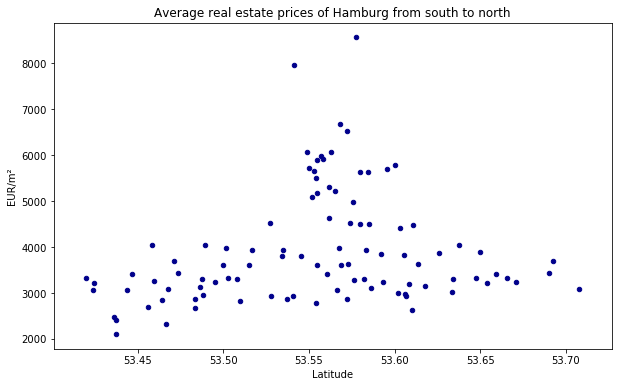

In [6]:
city_df.plot(kind='scatter', x='Latitude', y='Prices', figsize=(10, 6), color='darkblue')

plt.title('Average real estate prices of Hamburg from south to north')
plt.ylabel('EUR/m²')
plt.xlabel('Latitude')

plt.show()

As can be seen in the graph, the most expensive neighborhoods are roughly placed between 53.55 and 53.60 latitude. This is not surprising since the main area of Hamburg is located between those coordinates.

Now let's look at the distribution of the prices from east to west.

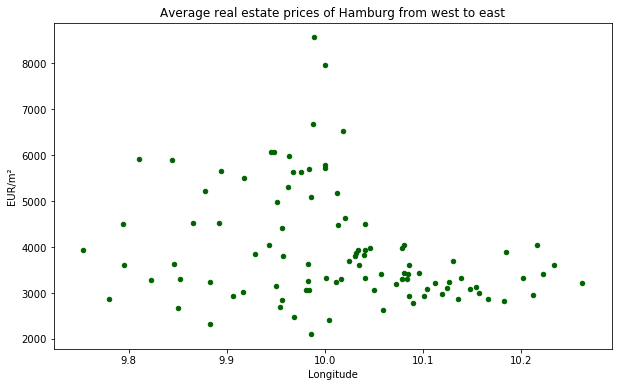

In [7]:
city_df.plot(kind='scatter', x='Longitude', y='Prices', figsize=(10, 6), color='darkgreen')

plt.title('Average real estate prices of Hamburg from west to east')
plt.ylabel('EUR/m²')
plt.xlabel('Longitude')

plt.show()

Again this result is not surprising since the noble suburbs of Hamburg called the Elbvororte comprising Blankenese, Othmarschen and Nienstedten are located to the west of the main city area while the center itself remains the most expensive area.

Next we will locate the individual districts on the map of Hamburg.

In [8]:
# define the world map
hamburg_map = folium.Map(location = [53.55, 10], zoom_start = 11)#, tiles='Stamen Toner')#, tiles='Mapbox Bright')



# instantiate a feature group for the incidents in the dataframe
neighbo = folium.map.FeatureGroup()



# add pop-up text to each marker on the map
latitudes = list(city_df.Latitude)
longitudes = list(city_df.Longitude)
labels = list(city_df.District)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(hamburg_map)    
    

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(city_df.Latitude, city_df.Longitude):
    neighbo.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='green',
            fill=True,
            popup=label,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add neighborhoods to map
hamburg_map.add_child(neighbo)

hamburg_map




Now we look at the real estate prices per district on a map.

In [9]:
hamburg_map = folium.Map(location = [53.55, 10], zoom_start = 11)





hamburg_geo = r'hamburg_districts.geojson'

threshold_scale = np.linspace(city_df['Prices'].min(),
                              city_df['Prices'].max(),
                              6, dtype=int)

threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum price

hamburg_map.choropleth(
    geo_data=hamburg_geo,
    data=city_df,
    columns=['District', 'Prices'],
    key_on='feature.properties.Stadtteil',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Real Estate Prices in Hamburg',
    reset=True
)


hamburg_map

Now onto accessing the Foursquare API and getting data about bookstores in Hamburg

In [10]:
CLIENT_ID = 'KRHLJL34T21YV3XOHHTLMQRFO3ZT5HSMZIEH3LLDOWJLJWVE'
CLIENT_SECRET = 'YSLYV1W3GPUZ5HV0YNYMY0WAJOMCVKG4FEELIF25EAQODJ3U'
VERSION = '20191029'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KRHLJL34T21YV3XOHHTLMQRFO3ZT5HSMZIEH3LLDOWJLJWVE
CLIENT_SECRET:YSLYV1W3GPUZ5HV0YNYMY0WAJOMCVKG4FEELIF25EAQODJ3U


In [11]:
#LIMIT = 50
radius = 1000
category = '4bf58dd8d48988d114951735'

def getDistrictBookstores(names, latitudes, longitudes):
    
    bookstores_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
            
            # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            category,
            radius)
            
            
        # create the API request URL
#        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
#            CLIENT_ID, 
#            CLIENT_SECRET, 
#            VERSION, 
#            lat, 
#            lng, 
#            radius, 
#            LIMIT)
            
        # make the GET request
        #print(requests.get(url).json())
        results = requests.get(url).json()["response"]['venues']
        #print(results)
        
        # return only relevant information for each nearby venue
        bookstores_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng']) for v in results])
            #v['venue']['categories'][0]['name']) for v in results])
    district_bookstores = pd.DataFrame([item for venue_list in bookstores_list for item in venue_list])
    district_bookstores.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Bookstores', 
                  'Bookstore Latitude', 
                  'Bookstore Longitude']
    
    return(district_bookstores)

In [12]:
hamburg_bookstores = getDistrictBookstores(names=city_df['District'], 
                                 latitudes=city_df['Latitude'],
                                 longitudes=city_df['Longitude'])


Hamburg-Altstadt
HafenCity
Neustadt
St. Pauli
St. Georg
Hammerbrook
Borgfelde
Hamm
Horn
Billstedt
Billbrook
Rothenburgsort
Veddel
Wilhelmsburg
Kleiner Grasbrook und Steinwerder
Waltershof und Finkenwerder
Altona-Altstadt
Sternschanze
Altona-Nord
Ottensen
Bahrenfeld
Groß Flottbek
Othmarschen
Lurup
Osdorf
Nienstedten
Blankenese
Iserbrook
Sülldorf
Rissen
Eimsbüttel
Rotherbaum
Harvestehude
Hoheluft-West
Lokstedt
Niendorf
Schnelsen
Eidelstedt
Stellingen
Hoheluft-Ost
Eppendorf
Groß Borstel
Alsterdorf
Winterhude
Uhlenhorst
Hohenfelde
Barmbek-Süd
Dulsberg
Barmbek-Nord
Ohlsdorf
Fuhlsbüttel
Langenhorn
Eilbek
Wandsbek
Marienthal
Jenfeld
Tonndorf
Farmsen-Berne
Bramfeld
Steilshoop
Wellingsbüttel
Sasel
Poppenbüttel
Hummelsbüttel
Lemsahl-Mellingstedt
Duvenstedt
Wohldorf-Ohlstedt
Bergstedt
Volksdorf
Rahlstedt
Lohbrügge
Bergedorf
Curslack
Altengamme
Neuengamme
Kirchwerder
Ochsenwerder
Reitbrook
Allermöhe
Billwerder
Moorfleet
Tatenberg
Spadenland
Neuallermöhe
Harburg
Neuland und Gut Moor
Wilstorf
Rönneb

In [13]:
hamburg_bookstores

District  District Latitude  District Longitude  \
0               Hamburg-Altstadt          53.550000           10.000000   
1               Hamburg-Altstadt          53.550000           10.000000   
2               Hamburg-Altstadt          53.550000           10.000000   
3               Hamburg-Altstadt          53.550000           10.000000   
4               Hamburg-Altstadt          53.550000           10.000000   
5               Hamburg-Altstadt          53.550000           10.000000   
6               Hamburg-Altstadt          53.550000           10.000000   
7               Hamburg-Altstadt          53.550000           10.000000   
8               Hamburg-Altstadt          53.550000           10.000000   
9               Hamburg-Altstadt          53.550000           10.000000   
10              Hamburg-Altstadt          53.550000           10.000000   
11              Hamburg-Altstadt          53.550000           10.000000   
12              Hamburg-Altstadt          53.550000           10.000000   
13              Hamburg-Altstadt          53.550000           10.000000   
14              Hamburg-Altstadt          53.550000           10.000000   
15              Hamburg-Altstadt          53.550000           10.000000   
16              Hamburg-Altstadt          53.550000           10.000000   
17              Hamburg-Altstadt          53.550000           10.000000   
18              Hamburg-Altstadt          53.550000           10.000000   
19              Hamburg-Altstadt          53.550000           10.000000   
20              Hamburg-Altstadt          53.550000           10.000000   
21              Hamburg-Altstadt          53.550000           10.000000   
22              Hamburg-Altstadt          53.550000           10.000000   
23              Hamburg-Altstadt          53.550000           10.000000   
24              Hamburg-Altstadt          53.550000           10.000000   
25              Hamburg-Altstadt          53.550000           10.000000   
26              Hamburg-Altstadt          53.550000           10.000000   
27              Hamburg-Altstadt          53.550000           10.000000   
28                     HafenCity          53.541111           10.000278   
29                     HafenCity          53.541111           10.000278   
30                     HafenCity          53.541111           10.000278   
31                     HafenCity          53.541111           10.000278   
32                     HafenCity          53.541111           10.000278   
33                     HafenCity          53.541111           10.000278   
34                     HafenCity          53.541111           10.000278   
35                     HafenCity          53.541111           10.000278   
36                     HafenCity          53.541111           10.000278   
37                     HafenCity          53.541111           10.000278   
38                      Neustadt          53.551944            9.985556   
39                      Neustadt          53.551944            9.985556   
40                      Neustadt          53.551944            9.985556   
41                      Neustadt          53.551944            9.985556   
42                      Neustadt          53.551944            9.985556   
43                      Neustadt          53.551944            9.985556   
44                      Neustadt          53.551944            9.985556   
45                      Neustadt          53.551944            9.985556   
46                      Neustadt          53.551944            9.985556   
47                      Neustadt          53.551944            9.985556   
48                      Neustadt          53.551944            9.985556   
49                      Neustadt          53.551944            9.985556   
50                      Neustadt          53.551944            9.985556   
51                      Neustadt          53.551944            9.985556   
52                      Neustadt          53.5519

In [14]:
district_bookstores = hamburg_bookstores.groupby(['District'], as_index=False, sort=False).count()
district_bookstores = district_bookstores[['District','Bookstores']]
district_bookstores

District  Bookstores
0              Hamburg-Altstadt          28
1                     HafenCity          10
2                      Neustadt          28
3                     St. Pauli          15
4                     St. Georg          20
5                   Hammerbrook           1
6                     Borgfelde           3
7                          Hamm           1
8                     Billstedt           2
9   Waltershof und Finkenwerder           1
10              Altona-Altstadt           4
11                 Sternschanze          18
12                  Altona-Nord           4
13                     Ottensen           8
14                Groß Flottbek           1
15                  Othmarschen           1
16                       Osdorf           3
17                   Blankenese           4
18                       Rissen           1
19                   Eimsbüttel          11
20                   Rotherbaum          15
21                 Harvestehude          12
22                Hoheluft-West          16
23                     Niendorf           1
24                   Eidelstedt           3
25                   Stellingen           1
26                 Hoheluft-Ost          12
27                    Eppendorf           4
28                   Winterhude           3
29                   Uhlenhorst           6
30                   Hohenfelde          10
31                  Barmbek-Süd           4
32                     Dulsberg           5
33                 Barmbek-Nord           3
34                     Ohlsdorf           1
35                  Fuhlsbüttel           5
36                       Eilbek           3
37                Farmsen-Berne           1
38                     Bramfeld           2
39                 Poppenbüttel           1
40                   Duvenstedt           1
41                    Rahlstedt           1
42                    Bergedorf           2
43                      Harburg           5
44                     Heimfeld           1

In [15]:
city_books_df = city_df.merge(district_bookstores[['District','Bookstores']], on = 'District', how = 'left', copy = 'False' )
city_books_df = city_books_df.fillna(0)
city_books_df

District  Prices   Latitude  Longitude  \
0                    Hamburg-Altstadt    5710  53.550000  10.000000   
1                           HafenCity    7958  53.541111  10.000278   
2                            Neustadt    5081  53.551944   9.985556   
3                           St. Pauli    5991  53.556944   9.963889   
4                           St. Georg    5169  53.555000  10.012222   
5                         Hammerbrook    3814  53.545278  10.030556   
6                           Borgfelde    3614  53.554722  10.034444   
7                                Hamm    3414  53.560833  10.057778   
8                                Horn    2789  53.553889  10.090000   
9                           Billstedt    2932  53.540556  10.101111   
10                          Billbrook    2932  53.527778  10.086111   
11                     Rothenburgsort    3937  53.535000  10.040833   
12                             Veddel    3937  53.516667  10.033333   
13                       Wilhelmsburg    3249  53.495000  10.011111   
14  Kleiner Grasbrook und Steinwerder    3814  53.534444   9.957222   
15        Waltershof und Finkenwerder    4514  53.527222   9.866111   
16                    Altona-Altstadt    6064  53.548889   9.947778   
17                       Sternschanze    5302  53.561667   9.962222   
18                        Altona-Nord    6064  53.563056   9.945278   
19                           Ottensen    5512  53.553889   9.917778   
20                         Bahrenfeld    4514  53.573889   9.892500   
21                      Groß Flottbek    5211  53.565278   9.877500   
22                        Othmarschen    5646  53.552778   9.894444   
23                              Lurup    3239  53.593056   9.882778   
24                             Osdorf    3621  53.572778   9.846667   
25                        Nienstedten    5886  53.555000   9.844722   
26                         Blankenese    5908  53.558333   9.811111   
27                          Iserbrook    3291  53.576389   9.823333   
28                           Sülldorf    4502  53.585000   9.794167   
29                             Rissen    3942  53.583056   9.753611   
30                         Eimsbüttel    4982  53.575833   9.951667   
31                         Rotherbaum    6668  53.568056   9.988333   
32                       Harvestehude    8560  53.577778   9.988889   
33                      Hoheluft-West    5624  53.580000   9.967222   
34                           Lokstedt    4403  53.603056   9.956389   
35                           Niendorf    3146  53.617778   9.950278   
36                          Schnelsen    3026  53.633333   9.916667   
37                         Eidelstedt    2939  53.606944   9.906111   
38                         Stellingen    3857  53.592222   9.928611   
39                       Hoheluft-Ost    5624  53.584722   9.976111   
40                          Eppendorf    5688  53.595556   9.983889   
41                       Groß Borstel    3622  53.613611   9.982500   
42                         Alsterdorf    4486  53.610833  10.013056   
43                         Winterhude    5780  53.600000  10.000000   
44                         Uhlenhorst    6530  53.572500  10.018611   
45                         Hohenfelde    4629  53.561667  10.020833   
46                        Barmbek-Süd    4504  53.580000  10.040556   
47                           Dulsberg    3057  53.566667  10.050000   
48                       Barmbek-Nord    3820  53.605278  10.040000   
49                           Ohlsdorf    3873  53.625833  10.031389   
50                        Fuhlsbüttel    3301  53.634444  10.016111   
51                         Langenhorn    3319  53.665556  10.001389   
52                             Eilbek    3976  53.567778  10.045556   
53                           Wandsbek    3309  53.581944  10.084167   
54                         Marienthal    3618  53.568889  10.085833   
55                            Jenfeld    2859  53.572

In [16]:
pos_center = (city_books_df.iloc[0]['Latitude'], city_books_df.iloc[0]['Longitude'])

distance_center = ()

for i in range(0, 99):
    pos_district = (city_books_df.iloc[i]['Latitude'], city_books_df.iloc[i]['Longitude'])
    dist = distance.euclidean(pos_district, pos_center)
    distance_center = distance_center + (dist,)
    
city_books_df['Distance'] = distance_center
    
city_books_df 


District  Prices   Latitude  Longitude  \
0                    Hamburg-Altstadt    5710  53.550000  10.000000   
1                           HafenCity    7958  53.541111  10.000278   
2                            Neustadt    5081  53.551944   9.985556   
3                           St. Pauli    5991  53.556944   9.963889   
4                           St. Georg    5169  53.555000  10.012222   
5                         Hammerbrook    3814  53.545278  10.030556   
6                           Borgfelde    3614  53.554722  10.034444   
7                                Hamm    3414  53.560833  10.057778   
8                                Horn    2789  53.553889  10.090000   
9                           Billstedt    2932  53.540556  10.101111   
10                          Billbrook    2932  53.527778  10.086111   
11                     Rothenburgsort    3937  53.535000  10.040833   
12                             Veddel    3937  53.516667  10.033333   
13                       Wilhelmsburg    3249  53.495000  10.011111   
14  Kleiner Grasbrook und Steinwerder    3814  53.534444   9.957222   
15        Waltershof und Finkenwerder    4514  53.527222   9.866111   
16                    Altona-Altstadt    6064  53.548889   9.947778   
17                       Sternschanze    5302  53.561667   9.962222   
18                        Altona-Nord    6064  53.563056   9.945278   
19                           Ottensen    5512  53.553889   9.917778   
20                         Bahrenfeld    4514  53.573889   9.892500   
21                      Groß Flottbek    5211  53.565278   9.877500   
22                        Othmarschen    5646  53.552778   9.894444   
23                              Lurup    3239  53.593056   9.882778   
24                             Osdorf    3621  53.572778   9.846667   
25                        Nienstedten    5886  53.555000   9.844722   
26                         Blankenese    5908  53.558333   9.811111   
27                          Iserbrook    3291  53.576389   9.823333   
28                           Sülldorf    4502  53.585000   9.794167   
29                             Rissen    3942  53.583056   9.753611   
30                         Eimsbüttel    4982  53.575833   9.951667   
31                         Rotherbaum    6668  53.568056   9.988333   
32                       Harvestehude    8560  53.577778   9.988889   
33                      Hoheluft-West    5624  53.580000   9.967222   
34                           Lokstedt    4403  53.603056   9.956389   
35                           Niendorf    3146  53.617778   9.950278   
36                          Schnelsen    3026  53.633333   9.916667   
37                         Eidelstedt    2939  53.606944   9.906111   
38                         Stellingen    3857  53.592222   9.928611   
39                       Hoheluft-Ost    5624  53.584722   9.976111   
40                          Eppendorf    5688  53.595556   9.983889   
41                       Groß Borstel    3622  53.613611   9.982500   
42                         Alsterdorf    4486  53.610833  10.013056   
43                         Winterhude    5780  53.600000  10.000000   
44                         Uhlenhorst    6530  53.572500  10.018611   
45                         Hohenfelde    4629  53.561667  10.020833   
46                        Barmbek-Süd    4504  53.580000  10.040556   
47                           Dulsberg    3057  53.566667  10.050000   
48                       Barmbek-Nord    3820  53.605278  10.040000   
49                           Ohlsdorf    3873  53.625833  10.031389   
50                        Fuhlsbüttel    3301  53.634444  10.016111   
51                         Langenhorn    3319  53.665556  10.001389   
52                             Eilbek    3976  53.567778  10.045556   
53                           Wandsbek    3309  53.581944  10.084167   
54                         Marienthal    3618  53.568889  10.085833   
55                            Jenfeld    2859  53.572

Showing Districts according to number of bookstores

In [17]:
hamburg_map = folium.Map(location = [53.55, 10], zoom_start = 11)



hamburg_geo = r'hamburg_districts.geojson'

threshold_scale = np.linspace(city_books_df['Bookstores'].min(),
                              city_books_df['Bookstores'].max(),
                              6, dtype=int)

threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum price

hamburg_map.choropleth(
    geo_data=hamburg_geo,
    data=city_books_df,
    columns=['District', 'Bookstores'],
    key_on='feature.properties.Stadtteil',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Number Bookstores per District in Hamburg',
    reset=True
)


hamburg_map

We can see that bookstores are mainly located in the central districts of Hamburg.

In [18]:
columns = ['Latitude', 'Longitude']
city_books_df_cluster = city_books_df.drop(columns, axis=1)



#city_books_df_cluster_grouped = city_books_df_cluster.groupby('District').mean().reset_index()

city_books_df_cluster
#toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

#toronto_grouped

District  Prices  Bookstores  Distance
0                    Hamburg-Altstadt    5710        28.0  0.000000
1                           HafenCity    7958        10.0  0.008893
2                            Neustadt    5081        28.0  0.014574
3                           St. Pauli    5991        15.0  0.036773
4                           St. Georg    5169        20.0  0.013205
5                         Hammerbrook    3814         1.0  0.030919
6                           Borgfelde    3614         3.0  0.034766
7                                Hamm    3414         1.0  0.058785
8                                Horn    2789         0.0  0.090084
9                           Billstedt    2932         2.0  0.101551
10                          Billbrook    2932         0.0  0.088932
11                     Rothenburgsort    3937         0.0  0.043501
12                             Veddel    3937         0.0  0.047140
13                       Wilhelmsburg    3249         0.0  0.056111
14  Kleiner Grasbrook und Steinwerder    3814         0.0  0.045519
15        Waltershof und Finkenwerder    4514         1.0  0.135813
16                    Altona-Altstadt    6064         4.0  0.052234
17                       Sternschanze    5302        18.0  0.039539
18                        Altona-Nord    6064         4.0  0.056258
19                           Ottensen    5512         8.0  0.082314
20                         Bahrenfeld    4514         0.0  0.110122
21                      Groß Flottbek    5211         1.0  0.123449
22                        Othmarschen    5646         1.0  0.105593
23                              Lurup    3239         0.0  0.124879
24                             Osdorf    3621         3.0  0.155016
25                        Nienstedten    5886         0.0  0.155358
26                         Blankenese    5908         4.0  0.189073
27                          Iserbrook    3291         0.0  0.178627
28                           Sülldorf    4502         0.0  0.208788
29                             Rissen    3942         1.0  0.248597
30                         Eimsbüttel    4982        11.0  0.054803
31                         Rotherbaum    6668        15.0  0.021497
32                       Harvestehude    8560        12.0  0.029918
33                      Hoheluft-West    5624        16.0  0.044434
34                           Lokstedt    4403         0.0  0.068679
35                           Niendorf    3146         1.0  0.084060
36                          Schnelsen    3026         0.0  0.117851
37                         Eidelstedt    2939         3.0  0.109808
38                         Stellingen    3857         1.0  0.082940
39                       Hoheluft-Ost    5624        12.0  0.042146
40                          Eppendorf    5688         4.0  0.048321
41                       Groß Borstel    3622         0.0  0.065974
42                         Alsterdorf    4486         0.0  0.062218
43                         Winterhude    5780         3.0  0.050000
44                         Uhlenhorst    6530         6.0  0.029200
45                         Hohenfelde    4629        10.0  0.023877
46                        Barmbek-Süd    4504         4.0  0.050446
47                           Dulsberg    3057         5.0  0.052705
48                       Barmbek-Nord    3820         3.0  0.068232
49                           Ohlsdorf    3873         1.0  0.082073
50                        Fuhlsbüttel    3301         5.0  0.085967
51                         Langenhorn    3319         0.0  0.115564
52                             Eilbek    3976         3.0  0.048902
53                           Wandsbek    3309         0.0  0.090025
54                         Marienthal    3618         0.0  0.087887
55                            Jenfeld    2859         0.0  0.137913
56                           Tonndorf    3100         0.0  0.129844
57                      Farmsen-Berne    2985         1.0  0.132337
58               

In [19]:
kclusters = 5

#X= preprocessing.StandardScaler().fit(X).transform(X)
#X[0:5]

city_books_df_cluster_drop = city_books_df_cluster.drop('District', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(city_books_df_cluster_drop)

kmeans.labels_[0:10]

array([3, 0, 2, 3, 2, 4, 4, 4, 1, 1], dtype=int32)

In [24]:
city_books_df.insert(0, 'Cluster Labels', kmeans.labels_)



#toronto_merged = toronto_df



# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood

#toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

city_books_df



District  Prices   Latitude  Longitude  \
0                    Hamburg-Altstadt    5710  53.550000  10.000000   
1                           HafenCity    7958  53.541111  10.000278   
2                            Neustadt    5081  53.551944   9.985556   
3                           St. Pauli    5991  53.556944   9.963889   
4                           St. Georg    5169  53.555000  10.012222   
5                         Hammerbrook    3814  53.545278  10.030556   
6                           Borgfelde    3614  53.554722  10.034444   
7                                Hamm    3414  53.560833  10.057778   
8                                Horn    2789  53.553889  10.090000   
9                           Billstedt    2932  53.540556  10.101111   
10                          Billbrook    2932  53.527778  10.086111   
11                     Rothenburgsort    3937  53.535000  10.040833   
12                             Veddel    3937  53.516667  10.033333   
13                       Wilhelmsburg    3249  53.495000  10.011111   
14  Kleiner Grasbrook und Steinwerder    3814  53.534444   9.957222   
15        Waltershof und Finkenwerder    4514  53.527222   9.866111   
16                    Altona-Altstadt    6064  53.548889   9.947778   
17                       Sternschanze    5302  53.561667   9.962222   
18                        Altona-Nord    6064  53.563056   9.945278   
19                           Ottensen    5512  53.553889   9.917778   
20                         Bahrenfeld    4514  53.573889   9.892500   
21                      Groß Flottbek    5211  53.565278   9.877500   
22                        Othmarschen    5646  53.552778   9.894444   
23                              Lurup    3239  53.593056   9.882778   
24                             Osdorf    3621  53.572778   9.846667   
25                        Nienstedten    5886  53.555000   9.844722   
26                         Blankenese    5908  53.558333   9.811111   
27                          Iserbrook    3291  53.576389   9.823333   
28                           Sülldorf    4502  53.585000   9.794167   
29                             Rissen    3942  53.583056   9.753611   
30                         Eimsbüttel    4982  53.575833   9.951667   
31                         Rotherbaum    6668  53.568056   9.988333   
32                       Harvestehude    8560  53.577778   9.988889   
33                      Hoheluft-West    5624  53.580000   9.967222   
34                           Lokstedt    4403  53.603056   9.956389   
35                           Niendorf    3146  53.617778   9.950278   
36                          Schnelsen    3026  53.633333   9.916667   
37                         Eidelstedt    2939  53.606944   9.906111   
38                         Stellingen    3857  53.592222   9.928611   
39                       Hoheluft-Ost    5624  53.584722   9.976111   
40                          Eppendorf    5688  53.595556   9.983889   
41                       Groß Borstel    3622  53.613611   9.982500   
42                         Alsterdorf    4486  53.610833  10.013056   
43                         Winterhude    5780  53.600000  10.000000   
44                         Uhlenhorst    6530  53.572500  10.018611   
45                         Hohenfelde    4629  53.561667  10.020833   
46                        Barmbek-Süd    4504  53.580000  10.040556   
47                           Dulsberg    3057  53.566667  10.050000   
48                       Barmbek-Nord    3820  53.605278  10.040000   
49                           Ohlsdorf    3873  53.625833  10.031389   
50                        Fuhlsbüttel    3301  53.634444  10.016111   
51                         Langenhorn    3319  53.665556  10.001389   
52                             Eilbek    3976  53.567778  10.045556   
53                           Wandsbek    3309  53.581944  10.084167   
54                         Marienthal    3618  53.568889  10.085833   
55                            Jenfeld    2859  53.572

In [25]:
# create map

map_clusters = folium.Map(location=[53.55, 10], zoom_start=11)


# set color scheme for the clusters

x = np.arange(kclusters)

ys = [i + x + (i*x)**2 for i in range(kclusters)]

colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))

rainbow = [colors.rgb2hex(i) for i in colors_array]



# add markers to the map

markers_colors = []

for lat, lon, poi, cluster in zip(city_books_df['Latitude'], city_books_df['Longitude'], city_books_df['District'], city_books_df['Cluster Labels']):

    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)

    folium.CircleMarker(

        [lat, lon],

        radius=5,

        popup=label,

        color=rainbow[int(np.nan_to_num(cluster)-1)],

        fill=True,

        fill_color=rainbow[int(np.nan_to_num(cluster)-1)],

        fill_opacity=0.7).add_to(map_clusters)

       

map_clusters

